In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
from common import *
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [4]:
dataf = "../../data/msyncscaling.csv"
dataf_hugepage = "../../data/msyncscaling_hugepage.csv"
dataf_cxlbuf = "../../data/msyncscaling_cxlbuf.csv"

In [5]:
!sha256sum $dataf

b4f599d055272321c2dad270711c1bc8fdcb6d7672c09dc6f8c1d46300140b06  ../../data/msyncscaling.csv


In [6]:
!sha256sum $dataf_hugepage

1a658880949ff8d0e5f82b626b72a1ac215a4ff2369b67c1b79060e7423eb03c  ../../data/msyncscaling_hugepage.csv


In [7]:
!sha256sum $dataf_cxlbuf

4b4d7cd34036422a218ee9be147bf33eb5e3af912d410a7e86f4ae552a74391c  ../../data/msyncscaling_cxlbuf.csv


In [8]:
df = pd.read_csv(dataf, index_col=None, names=['Threads', 'Time'])
df_hugepage = pd.read_csv(dataf_hugepage, index_col=None, names=['Threads', 'Time'])
df_cxlbuf = pd.read_csv(dataf_cxlbuf, index_col=None, names=['Threads', 'Time'])

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Time,88444099,97778183,119986310,133448654,148120319,156375227,169193168,180612643,190522257,201453966,210572131,221043504,241753169,248247869,262414060,272510022,286892639,301736383,316183823,322870797,336933880,361818825,365432663,375765806,389981948,397663842,411501145,428320388,434759545,443628828,458909480,476453748,481392786,488032623,500156060,514426834,527303163,537921488,544998286


In [10]:
df_hugepage.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Time,86234981,106361760,122086595,132785095,146280144,151513035,161773078,175301030,189624372,196258439,209580494,222798028,237149172,258214673,261614114,275898574,286368611,298657323,316221117,323038803,335406343,350923612,363917005,377755193,392405217,399817358,411765315,425101474,436679826,448844497,453888799,471758983,478383792,490568940,502792500,512763272,524190640,603888114,546151729


In [11]:
df_cxlbuf.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Time,70749053,69769141,72186484,72471520,75192277,82916024,88168443,95355454,102911591,113049601,122867644,132105404,147237066,160634351,169650062,178734637,194062147,208310679,217955087,226443731,236866101,248358900,260982542,271601810,281844863,293115999,308314736,311914076,324625256,333612265,345234020,359123302,380925319,376080535,393019721,397873157,406480204,419832688,431017684


In [12]:
df
df.index = df['Threads']
del df['Threads']

In [13]:
df_hugepage
df_hugepage.index = df_hugepage['Threads']
del df_hugepage['Threads']

In [14]:
df_cxlbuf
df_cxlbuf.index = df_cxlbuf['Threads']
del df_cxlbuf['Threads']

In [15]:
df_norm = df/df['Time'][1]
df_hugepage_norm = df_hugepage/df_hugepage['Time'][1]
df_cxlbuf_norm = df_cxlbuf/df_cxlbuf['Time'][1]

In [16]:
df_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Time,1.0,1.105537,1.356634,1.508847,1.674734,1.768069,1.912996,2.042111,2.154155,2.277755,2.38085,2.499245,2.733401,2.806834,2.967005,3.081155,3.243774,3.411606,3.574957,3.650563,3.809569,4.090932,4.131792,4.248625,4.409361,4.496217,4.652669,4.842837,4.915642,5.015923,5.188695,5.387061,5.442905,5.517978,5.655053,5.816407,5.961994,6.082051,6.162065


In [17]:
df_hugepage_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Time,1.0,1.233395,1.415743,1.539805,1.696297,1.756979,1.875957,2.03283,2.198926,2.275856,2.430342,2.583615,2.750034,2.994315,3.033735,3.199381,3.320794,3.463297,3.66697,3.74603,3.889446,4.069388,4.220062,4.380533,4.550418,4.636371,4.774922,4.929571,5.063836,5.204901,5.263395,5.470622,5.547445,5.688746,5.830494,5.946117,6.078631,7.002821,6.333297


In [18]:
df_cxlbuf_norm.T

Threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
Time,1.0,0.986149,1.020317,1.024346,1.062803,1.171974,1.246214,1.347798,1.4546,1.597896,1.736668,1.867239,2.081117,2.270481,2.397913,2.526318,2.742965,2.94436,3.080679,3.200661,3.347976,3.51042,3.688849,3.838946,3.983726,4.143038,4.357864,4.408739,4.588404,4.715431,4.879698,5.076016,5.384176,5.315697,5.555123,5.623724,5.74538,5.93411,6.092204


In [19]:
df_plot = pd.DataFrame()
df_plot['msync (4KiB)'] = df['Time']
df_plot['msync (2MiB)'] = df_hugepage['Time']
df_plot['Snapy'] = df_cxlbuf['Time']

In [20]:
Fig.config(12, (8, 2))

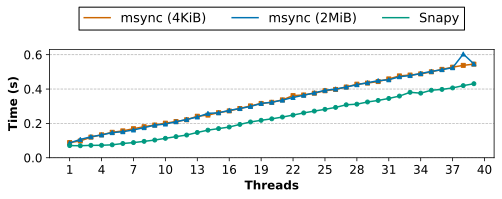

In [39]:
color=[CBcdict['Ve'], CBcdict['Bu'], CBcdict['bG']]
ax = (df_plot/10**9).plot(**Fig.get_kwargs(bar=False, color=color))
f = Fig(ax)
f.fmt_legend(fontsize=fontsize+2)
f.fmt_label('Threads', 'Time (s)')
f.fmt_grid(axis='y', linestyle='--', linewidth=0.7)
marker=['s', '^', 'o']
for i, line in enumerate(ax.get_lines()):
    line.set_marker(marker[i])
    line.set_markersize(4)
# ax.set_ylim(0, 0.1)
ax.set_yticks(np.arange(0, 0.71, 0.2))
_ = ax.set_xticks(np.arange(1, 40.1, 3))